<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Imad/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 311-Calls Clustering

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

# Prepare Backup

In [3]:
# Backup Copy
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/main/data/merged_requests.zip'
backup = read_data_from_URL(serv_req_url)

In [4]:
# Drop unneeded columns as listed above
backup.drop(columns=['Unnamed: 0', 'OBJECTID', 'DEPARTMENT', 'REQUEST_NO', 
                       'REQUEST_TYPE', 'RECEIVED_DATE', 'RECEIVED_MONTH', 'RECEIVED_YEAR', 
                       'SEASON', 'INTERNAL_FIELD_OBSERVATION', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 
                       'RECEIVED_DAY', 'ADDRESS_ID', 'EMPLOYED_All', 'PERCENT EMPLOYED_Not in labor force',
                       'PERCENT EMPLOYED_Female Only', 'COMMUTING TO WORK_All', 'PERCENT COMMUTING TO WORK_By Car',
                       'PERCENT COMMUTING TO WORK_Public transportation', 'PERCENT COMMUTING TO WORK_Walk', 
                       'PERCENT COMMUTING TO WORK_Other', 'PERCENT COMMUTING TO WORK_Worked at home', 
                       'INCOME AND BENEFITS_Total households', 'PERCENT HOUSEHOLD INCOME_Retired Householders'], inplace=True)

In [5]:
backup.head()

,REQUEST_CAT,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,LATITUDE,LONGITUDE,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,NON_RECYCLABLE ITEMS,215.0,3601.0,35.132444,-80.812089,15,0.000311,0.705954,0.213424,0.576240,0.210336,79300.428571,111885.642857,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN
1,UTILITY VERIFICATION LTR,265.0,4124.0,35.350408,-80.781941,10,0.000311,0.740375,0.241599,0.674026,0.084375,63391.250000,74852.450000,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN
2,NON_RECYCLABLE ITEMS,103.0,523.0,35.282654,-80.771094,7,0.002486,0.700170,0.462024,0.500445,0.037530,41973.411765,51723.764706,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN
3,MISSED SERVICE,158.0,1801.0,35.297745,-80.880327,21,0.002020,0.680489,0.393800,0.552855,0.053345,46401.066667,59119.666667,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN
4,CWP,88.0,309.0,35.254120,-80.877772,7,0.003730,0.720768,0.451759,0.497509,0.050732,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y


In [6]:
# Drop NA's
backup = backup.dropna()

In [22]:
backup.shape

(161310, 19)

# Backup DF will be used to merge requests.Clusters back into the original data

In [7]:
# Read in the merged, preprocessed data
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/main/data/merged_requests.zip'
requests = read_data_from_URL(serv_req_url)
requests.head()

,Unnamed: 0,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,RECEIVED_DAY,TOTAL_CALLS,ADDRESS_ID,CRIME_SCORE,EMPLOYED_All,PERCENT EMPLOYED_In labor force,PERCENT EMPLOYED_Not in labor force,PERCENT EMPLOYED_Female Only,COMMUTING TO WORK_All,PERCENT COMMUTING TO WORK_By Car,PERCENT COMMUTING TO WORK_Public transportation,PERCENT COMMUTING TO WORK_Walk,PERCENT COMMUTING TO WORK_Other,PERCENT COMMUTING TO WORK_Worked at home,INCOME AND BENEFITS_Total households,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,PERCENT HOUSEHOLD INCOME_Retired Householders,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,N,215.0,3601.0,28226,1458251.0,508075.0,35.132444,-80.812089,2016-11-07,15,21882,0.000311,3571.000000,0.705954,0.294046,0.547692,2315.000000,0.867800,0.020731,0.014661,0.012267,0.084541,1852.928571,0.213424,0.576240,0.210336,0.157483,79300.428571,111885.642857,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN
1,1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:00:00,11,2016,4,N,265.0,4124.0,28269,1468687.0,587226.0,35.350408,-80.781941,2016-11-07,10,43252,0.000311,3877.600000,0.740375,0.259625,0.528438,2580.900000,0.895156,0.020414,0.007693,0.010918,0.065818,1925.100000,0.241599,0.674026,0.084375,0.129942,63391.250000,74852.450000,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN
2,2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,N,103.0,523.0,28213,1471481.0,562513.0,35.282654,-80.771094,2016-11-07,7,73999,0.002486,3095.470588,0.700170,0.299830,0.531391,1856.411765,0.885311,0.040584,0.029221,0.010399,0.034484,1308.647059,0.462024,0.500445,0.037530,0.113167,41973.411765,51723.764706,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN
3,3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:00:00,11,2016,4,N,158.0,1801.0,28216,1438992.0,568604.0,35.297745,-80.880327,2016-11-07,21,8430,0.002020,3548.600000,0.680489,0.319511,0.539649,2128.266667,0.865405,0.057418,0.021834,0.017391,0.037952,1645.333333,0.393800,0.552855,0.053345,0.128969,46401.066667,59119.666667,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN
4,4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:00:00,11,2016,4,N,88.0,309.0,28208,1439454.0,552715.0,35.254120,-80.877772,2016-11-07,7,75771,0.003730,2972.444444,0.720768,0.279232,0.527302,1835.777778,0.812170,0.081005,0.039119,0.039021,0.028684,1481.222222,0.451759,0.497509,0.050732,0.097692,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y


In [8]:
# Value Counts for Requests Category
requests['REQUEST_CAT'].value_counts()

NON_RECYCLABLE ITEMS         820199
RECYCLABLE ITEMS             196945
CART                         107771
HNS HEALTH AND SANITATION     77723
TRANSPORTATION                52467
MISSED SERVICE                43400
GARBAGE                       30604
311 DOCUMENT                  22379
RECYCLING                     22200
VIOLATIONS                    15821
YARD WASTE                    15796
TIRES                         13440
WEATHER AND ENVIRONMENTAL     11641
ZONING                        11410
DEAD ANIMAL COLLECTION        10701
ZONING/COMPLAINT/ INSPECT      9994
COMPLAINT                      8486
HNS HOUSING                    8161
BULKY ITEM                     8045
ZON GENERAL INFO  INQUIRY      7894
CUSTOMER FEEDBACK              6835
BLOCKAGE                       4462
CLEANLINESS                    3447
CWP                            2645
DISABILITY ACT                 2525
ADMINISTRATIVE ACTIONS         2326
ESCALATION REQUEST             1791
UTILITY VERIFICATION LTR    

In [9]:
# Value Counts for NEIGHBORHOOD_PROFILE_AREA
requests['NEIGHBORHOOD_PROFILE_AREA'].value_counts()

 371.0    19222
 372.0    18037
 385.0    16305
 389.0    15401
 392.0    14881
          ...  
 412.0       20
 398.0       19
 62.0        16
-1.0         15
 468.0        6
Name: NEIGHBORHOOD_PROFILE_AREA, Length: 463, dtype: int64

In [10]:
# Examine NEIGHBORHOOD_PROFILE_AREA
print('Min NPA = ', requests['NEIGHBORHOOD_PROFILE_AREA'].min())
print('Max NPA = ', requests['NEIGHBORHOOD_PROFILE_AREA'].max())
print('Range of NPA = ', requests['NEIGHBORHOOD_PROFILE_AREA'].max() - requests['NEIGHBORHOOD_PROFILE_AREA'].min())


Min NPA =  -1.0
Max NPA =  475.0
Range of NPA =  476.0


In [11]:
requests.head()

,Unnamed: 0,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,RECEIVED_DAY,TOTAL_CALLS,ADDRESS_ID,CRIME_SCORE,EMPLOYED_All,PERCENT EMPLOYED_In labor force,PERCENT EMPLOYED_Not in labor force,PERCENT EMPLOYED_Female Only,COMMUTING TO WORK_All,PERCENT COMMUTING TO WORK_By Car,PERCENT COMMUTING TO WORK_Public transportation,PERCENT COMMUTING TO WORK_Walk,PERCENT COMMUTING TO WORK_Other,PERCENT COMMUTING TO WORK_Worked at home,INCOME AND BENEFITS_Total households,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,PERCENT HOUSEHOLD INCOME_Retired Householders,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,N,215.0,3601.0,28226,1458251.0,508075.0,35.132444,-80.812089,2016-11-07,15,21882,0.000311,3571.000000,0.705954,0.294046,0.547692,2315.000000,0.867800,0.020731,0.014661,0.012267,0.084541,1852.928571,0.213424,0.576240,0.210336,0.157483,79300.428571,111885.642857,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN
1,1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:00:00,11,2016,4,N,265.0,4124.0,28269,1468687.0,587226.0,35.350408,-80.781941,2016-11-07,10,43252,0.000311,3877.600000,0.740375,0.259625,0.528438,2580.900000,0.895156,0.020414,0.007693,0.010918,0.065818,1925.100000,0.241599,0.674026,0.084375,0.129942,63391.250000,74852.450000,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN
2,2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:00:00,11,2016,4,N,103.0,523.0,28213,1471481.0,562513.0,35.282654,-80.771094,2016-11-07,7,73999,0.002486,3095.470588,0.700170,0.299830,0.531391,1856.411765,0.885311,0.040584,0.029221,0.010399,0.034484,1308.647059,0.462024,0.500445,0.037530,0.113167,41973.411765,51723.764706,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN
3,3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:00:00,11,2016,4,N,158.0,1801.0,28216,1438992.0,568604.0,35.297745,-80.880327,2016-11-07,21,8430,0.002020,3548.600000,0.680489,0.319511,0.539649,2128.266667,0.865405,0.057418,0.021834,0.017391,0.037952,1645.333333,0.393800,0.552855,0.053345,0.128969,46401.066667,59119.666667,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN
4,4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:00:00,11,2016,4,N,88.0,309.0,28208,1439454.0,552715.0,35.254120,-80.877772,2016-11-07,7,75771,0.003730,2972.444444,0.720768,0.279232,0.527302,1835.777778,0.812170,0.081005,0.039119,0.039021,0.028684,1481.222222,0.451759,0.497509,0.050732,0.097692,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y


In [12]:
# Drop unneeded columns as listed above
requests.drop(columns=['Unnamed: 0', 'OBJECTID', 'DEPARTMENT', 'REQUEST_NO', 
                       'REQUEST_TYPE', 'RECEIVED_DATE', 'RECEIVED_MONTH', 'RECEIVED_YEAR', 
                       'SEASON', 'INTERNAL_FIELD_OBSERVATION', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 
                       'RECEIVED_DAY', 'ADDRESS_ID', 'EMPLOYED_All', 'PERCENT EMPLOYED_Not in labor force',
                       'PERCENT EMPLOYED_Female Only', 'COMMUTING TO WORK_All', 'PERCENT COMMUTING TO WORK_By Car',
                       'PERCENT COMMUTING TO WORK_Public transportation', 'PERCENT COMMUTING TO WORK_Walk', 
                       'PERCENT COMMUTING TO WORK_Other', 'PERCENT COMMUTING TO WORK_Worked at home', 
                       'INCOME AND BENEFITS_Total households', 'PERCENT HOUSEHOLD INCOME_Retired Householders'], inplace=True)

# Also remove:
# 'INCOME AND BENEFITS_Median households income (dollars)', 'INCOME AND BENEFITS_Mean households income (dollars)'
# 'INCOME AND BENEFITS_Per capita Income', 'INCOME AND BENEFITS_Median earnings for workers (dollars)',
# 'PERCENT INSURED_Population without health insurance'


In [13]:
requests.head()

,REQUEST_CAT,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,LATITUDE,LONGITUDE,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,NON_RECYCLABLE ITEMS,215.0,3601.0,35.132444,-80.812089,15,0.000311,0.705954,0.213424,0.576240,0.210336,79300.428571,111885.642857,47529.928571,43332.642857,0.917971,0.082029,7.135714,NaN
1,UTILITY VERIFICATION LTR,265.0,4124.0,35.350408,-80.781941,10,0.000311,0.740375,0.241599,0.674026,0.084375,63391.250000,74852.450000,29914.900000,37226.300000,0.869184,0.130816,8.050000,NaN
2,NON_RECYCLABLE ITEMS,103.0,523.0,35.282654,-80.771094,7,0.002486,0.700170,0.462024,0.500445,0.037530,41973.411765,51723.764706,19338.294118,23576.882353,0.814082,0.185918,25.811765,NaN
3,MISSED SERVICE,158.0,1801.0,35.297745,-80.880327,21,0.002020,0.680489,0.393800,0.552855,0.053345,46401.066667,59119.666667,22976.800000,28399.600000,0.834642,0.165358,16.960000,NaN
4,CWP,88.0,309.0,35.254120,-80.877772,7,0.003730,0.720768,0.451759,0.497509,0.050732,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y


In [14]:
# Drop the other columns 11-16
requests.drop(requests.columns[[11, 12, 13, 14, 15, 16]], axis = 1, inplace = True)

In [15]:
requests.head()

,REQUEST_CAT,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,LATITUDE,LONGITUDE,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,NON_RECYCLABLE ITEMS,215.0,3601.0,35.132444,-80.812089,15,0.000311,0.705954,0.213424,0.576240,0.210336,7.135714,NaN
1,UTILITY VERIFICATION LTR,265.0,4124.0,35.350408,-80.781941,10,0.000311,0.740375,0.241599,0.674026,0.084375,8.050000,NaN
2,NON_RECYCLABLE ITEMS,103.0,523.0,35.282654,-80.771094,7,0.002486,0.700170,0.462024,0.500445,0.037530,25.811765,NaN
3,MISSED SERVICE,158.0,1801.0,35.297745,-80.880327,21,0.002020,0.680489,0.393800,0.552855,0.053345,16.960000,NaN
4,CWP,88.0,309.0,35.254120,-80.877772,7,0.003730,0.720768,0.451759,0.497509,0.050732,20.682353,Y


In [16]:
# Drop the other columns 0-3
requests.drop(requests.columns[[0, 1, 2, 3, 4]], axis = 1, inplace = True)

In [17]:
requests.head()

,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,15,0.000311,0.705954,0.213424,0.576240,0.210336,7.135714,NaN
1,10,0.000311,0.740375,0.241599,0.674026,0.084375,8.050000,NaN
2,7,0.002486,0.700170,0.462024,0.500445,0.037530,25.811765,NaN
3,21,0.002020,0.680489,0.393800,0.552855,0.053345,16.960000,NaN
4,7,0.003730,0.720768,0.451759,0.497509,0.050732,20.682353,Y


In [18]:
# Need to standardize Total_Calls
from sklearn.preprocessing import StandardScaler
requests[['TOTAL_CALLS']] = StandardScaler().fit_transform(requests[['TOTAL_CALLS']])


In [19]:
requests.head()

,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING
0,-0.158456,0.000311,0.705954,0.213424,0.576240,0.210336,7.135714,NaN
1,-0.270466,0.000311,0.740375,0.241599,0.674026,0.084375,8.050000,NaN
2,-0.337671,0.002486,0.700170,0.462024,0.500445,0.037530,25.811765,NaN
3,-0.024045,0.002020,0.680489,0.393800,0.552855,0.053345,16.960000,NaN
4,-0.337671,0.003730,0.720768,0.451759,0.497509,0.050732,20.682353,Y


In [20]:
# Drop NA's
requests = requests.dropna()

In [21]:
requests.shape

(161310, 8)

# Trying KPROTOTYPES Clustering
## This will allow us to use Categorical Data in our Clustering

In [23]:
# Install kmodes
! pip install kmodes
 

In [24]:
from kmodes.kprototypes import KPrototypes 

In [25]:
# Step 1: Covert df into a numpy array
df_array = requests.values 

In [26]:
# Step 2: Define which columns are supposed to be numeric
df_array[:, 0] = df_array[:, 0].astype(float) 
df_array[:, 1] = df_array[:, 1].astype(float) 
df_array[:, 2] = df_array[:, 2].astype(float) 
df_array[:, 3] = df_array[:, 3].astype(float) 
df_array[:, 4] = df_array[:, 4].astype(float) 
df_array[:, 5] = df_array[:, 5].astype(float) 
df_array[:, 6] = df_array[:, 6].astype(float) 



In [27]:
# Step 3: Setup the model

kproto = KPrototypes(n_clusters = 5,
                     max_iter = 5)

clusters = kproto.fit_predict(df_array, categorical = [7])

In [28]:
# Print Clusters
print(kproto.cluster_centroids_)

[['0.1658317037951694' '0.006873095821638697' '0.7763586330502797'
  '0.2227127219750336' '0.5159438857444353' '0.2613433922800662'
  '11.366668261934127' 'Y']
 ['-0.014351963411201325' '0.0027842112272881653' '0.7399712709860541'
  '0.409822111654088' '0.5154518562629323' '0.07472603208300554'
  '18.009718540763185' 'Y']
 ['-0.1901591644071834' '0.008339195705826748' '0.7523954300946994'
  '0.18583894579980695' '0.4965497073695066' '0.31761134683100356'
  '9.187654634528327' 'B']
 ['-0.011188456787624207' '0.0045649683546203695' '0.6985025346953031'
  '0.3411986803973492' '0.5457474131869309' '0.11305390641571289'
  '14.728819690409521' 'R']
 ['-0.060751024728414434' '0.0047090790153298655' '0.698834337625428'
  '0.46770095511861776' '0.4583821932709859' '0.0739168516101476'
  '22.067699310037895' 'Y']]


In [29]:
# Attach Clusters to the Backup DF

cluster_dict = []
for c in clusters:
  cluster_dict.append(c)

In [ ]:
# View the dictionary
cluster_dict

In [31]:
# Assign Cluster Dictionary Back to Original DF
backup['cluster'] = cluster_dict

In [32]:
# Double check if we have added clusters to the original data
backup.head()

,REQUEST_CAT,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,LATITUDE,LONGITUDE,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING,cluster
4,CWP,88.0,309.0,35.254120,-80.877772,7,0.003730,0.720768,0.451759,0.497509,0.050732,42745.529412,53659.352941,23808.882353,29559.117647,0.825033,0.174967,20.682353,Y,4
19,NON_RECYCLABLE ITEMS,386.0,1015.0,35.237288,-80.807337,5,0.001990,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
64,BULKY ITEM,386.0,1836.0,35.234153,-80.809887,18,0.001990,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
68,TIRES,37.0,1521.0,35.231663,-80.816705,18,0.004797,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
81,WEATHER AND ENVIRONMENTAL,367.0,325.0,35.214877,-80.823880,2,0.008270,0.757902,0.288506,0.497652,0.213842,72715.555556,108829.777778,56907.444444,49571.555556,0.922552,0.077448,14.533333,Y,3


In [34]:
# Take a look at Cluster 0
c_0 = backup[backup['cluster'] == 0]
c_0.head(10)

,REQUEST_CAT,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,LATITUDE,LONGITUDE,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING,cluster
118,RECYCLING,3.0,1904.0,35.202458,-80.847938,9,0.013644,0.810697,0.240830,0.548064,0.211106,75988.375000,112120.500000,60731.250000,53428.625000,0.930831,0.069169,11.8875,B,0
174,NON_RECYCLABLE ITEMS,163.0,205.0,35.214778,-80.832796,125,0.002459,0.734846,0.232150,0.465533,0.302316,72935.333333,114527.666667,60070.555556,52855.222222,0.936432,0.063568,12.0700,R,0
225,TRANSPORTATION,3.0,2421.0,35.202842,-80.862478,19,0.013644,0.810697,0.240830,0.548064,0.211106,75988.375000,112120.500000,60731.250000,53428.625000,0.930831,0.069169,11.8875,B,0
280,NON_RECYCLABLE ITEMS,3.0,728.0,35.214293,-80.847272,4,0.013644,0.810697,0.240830,0.548064,0.211106,75988.375000,112120.500000,60731.250000,53428.625000,0.930831,0.069169,11.8875,B,0
524,NON_RECYCLABLE ITEMS,388.0,2027.0,35.214082,-80.869569,27,0.002459,0.809473,0.215270,0.558648,0.226082,81175.875000,118292.750000,63064.375000,55744.000000,0.944432,0.055568,10.9250,Y,0
571,RECYCLABLE ITEMS,388.0,2204.0,35.212930,-80.868032,3,0.002459,0.809473,0.215270,0.558648,0.226082,81175.875000,118292.750000,63064.375000,55744.000000,0.944432,0.055568,10.9250,Y,0
782,NON_RECYCLABLE ITEMS,388.0,1934.0,35.213341,-80.865755,3,0.003308,0.810697,0.240830,0.548064,0.211106,75988.375000,112120.500000,60731.250000,53428.625000,0.930831,0.069169,11.8875,Y,0
1031,NON_RECYCLABLE ITEMS,388.0,1515.0,35.219452,-80.861739,24,0.002331,0.799335,0.266507,0.531031,0.202462,72845.625000,107040.875000,57777.500000,50594.250000,0.922959,0.077041,12.9750,Y,0
1186,NON_RECYCLABLE ITEMS,388.0,1923.0,35.213712,-80.866336,8,0.003590,0.822280,0.195224,0.555178,0.249598,86607.000000,126989.875000,67927.875000,58589.750000,0.947116,0.052884,9.9875,Y,0
1217,MISSED SERVICE,367.0,1925.0,35.213564,-80.818822,43,0.006483,0.734846,0.232150,0.465533,0.302316,72935.333333,114527.666667,60070.555556,52855.222222,0.936432,0.063568,12.0700,Y,0


In [35]:
# Take a look at Cluster 1
c_1 = backup[backup['cluster'] == 1]
c_1.head(10)

,REQUEST_CAT,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,LATITUDE,LONGITUDE,TOTAL_CALLS,CRIME_SCORE,PERCENT EMPLOYED_In labor force,PERCENT HOUSEHOLD INCOME_Lower Income Households,PERCENT HOUSEHOLD INCOME_Mid Income Households,PERCENT HOUSEHOLD INCOME_Higher Income Households,INCOME AND BENEFITS_Median households income (dollars),INCOME AND BENEFITS_Mean households income (dollars),INCOME AND BENEFITS_Per capita Income,INCOME AND BENEFITS_Median earnings for workers (dollars),PERCENT INSURED_Population with health insurance,PERCENT INSURED_Population without health insurance,PERCENTAGE BELOW POVERTY LEVEL_All,HISTORIC_REDLINING,cluster
19,NON_RECYCLABLE ITEMS,386.0,1015.0,35.237288,-80.807337,5,0.001990,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
64,BULKY ITEM,386.0,1836.0,35.234153,-80.809887,18,0.001990,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
68,TIRES,37.0,1521.0,35.231663,-80.816705,18,0.004797,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
150,NON_RECYCLABLE ITEMS,343.0,2908.0,35.245094,-80.808730,12,0.003837,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,R,1
151,RECYCLING,378.0,2201.0,35.228740,-80.795265,8,0.005401,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,B,1
216,NON_RECYCLABLE ITEMS,378.0,1812.0,35.226144,-80.805509,4,0.005401,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,B,1
217,CART,10.0,3138.0,35.236840,-80.790921,4,0.008670,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
292,NON_RECYCLABLE ITEMS,5.0,3910.0,35.254360,-80.884237,45,0.000995,0.730238,0.439743,0.510021,0.050236,44295.823529,54479.294118,24321.470588,30520.352941,0.830497,0.169503,19.652941,Y,1
324,NON_RECYCLABLE ITEMS,37.0,1517.0,35.232045,-80.817748,10,0.004797,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1
347,NON_RECYCLABLE ITEMS,10.0,1708.0,35.239942,-80.787941,8,0.007577,0.747104,0.436481,0.494893,0.068627,45000.130435,59457.956522,26401.173913,28324.217391,0.776592,0.223408,19.469565,Y,1


In [36]:
# Take a look at Cluster 2
c_2 = backup[backup['cluster'] == 2]

In [37]:
# Take a look at Cluster 3
c_3 = backup[backup['cluster'] == 3]

In [38]:
# Take a look at Cluster 4
c_4 = backup[backup['cluster'] == 4]

# Visualize on a ShapeFile?

In [ ]:
! pip install geopandas
import geopandas as gpd

! pip install contextily
import contextily as ctx


In [40]:
# mount and connect my drive to access shape files 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
# IMPORT SHAPE FILE FOR MAPPING
npa_map = gpd.read_file('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/NPA/npa.shp')

# Layers into a web mercator projection
# reproject to web mercator
npa_map = npa_map.to_crs(epsg=4326)

In [42]:
# Turn Backup into a GeoPandas Data Frame

geo_requests = gpd.GeoDataFrame(backup, 
                                crs = 'EPSG:4326',
                                geometry = gpd.points_from_xy(backup.LONGITUDE, 
                                                              backup.LATITUDE))

In [43]:
# Confirm reproject to CRS = EPSG 4326 (Map with Long/Lat)
geo_requests = geo_requests.to_crs(epsg=4326)

In [44]:
# convert lat/lon to floats
geo_requests.LONGITUDE = geo_requests.LONGITUDE.astype('float')
geo_requests.LATITUDE = geo_requests.LATITUDE.astype('float')

In [45]:
# drop the unmapped rows - anything that has a longitude of 0 should be removed
geo_requests = geo_requests[geo_requests.LONGITUDE!=0]
geo_requests = geo_requests[geo_requests.LATITUDE!=0]

In [46]:
# get the bounding box coordinates for the 311 calls data
minx, miny, maxx, maxy = geo_requests.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-85.56829116
-80.77474209
35.16855221
35.27547993


In [47]:
# get the bounding box coordinates for the SHAPE FILE calls data
minx, miny, maxx, maxy = npa_map.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-81.05802900022775
-80.55029699963121
35.00171000120846
35.51510300167768


Text(0.5, 1.0, 'Cluster Zero')

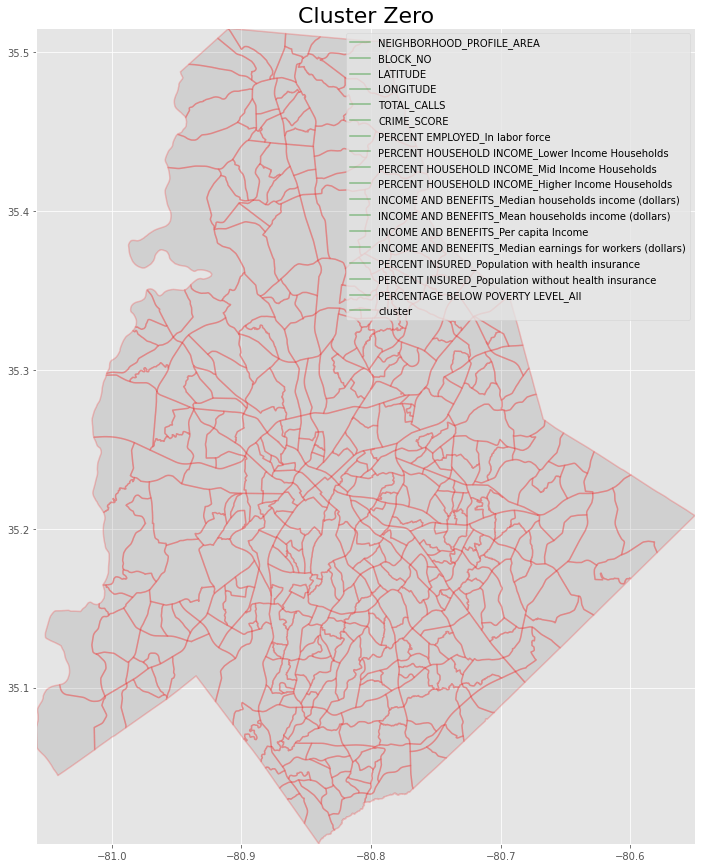

In [48]:
# Checking out what a plot looks like
fig, ax = plt.subplots(figsize=(15,15))

# Plots 1: Background Map
npa_map.plot(ax=ax,
             color='grey', 
             edgecolor='red',
             lw=1.5,
             alpha=0.2)

# Plot 2: Cluster Zero
c_0.plot(ax=ax, 
         color='green',
         markersize=2,
         alpha=0.4)

# Plot 3: Cluster One
# c_1.plot(ax=ax, 
#          color='yellow',
#          markersize=2,
#          alpha=0.8)

# Use the bouding coordinates to set the x and y limits
ax.set_xlim(minx, maxx) 
ax.set_ylim(miny, maxy)

# no axis
# ax.axis('off')
ax.set_title('Cluster Zero',fontsize=22)

# add a basemap
# ctx.add_basemap(ax, crs = npa_map.crs.to_string())